In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt

from EcmP_supervised.utils.metrics import metric, MAE, MAPE

In [2]:
def data_inverse(label_c, original_dimension, original_position, scaler): #original dimensino(2D) without the label_c column
    temp_matrix = np.full(original_dimension, 0, np.float32)
    temp_matrix = np.insert(temp_matrix, original_position, label_c, axis=1)
    return scaler.inverse_transform(temp_matrix)[:, original_position]

In [4]:


scaler_path = r'./scaler/AAPL_pct/AAPL_pct_60_10.pkl'


path_common = r'inference_results\PTFT2016V2PCIE_AAPL_pct_60_10_EcmP_mk3_stock_custom_pred_ftMS_sl60_ll0_pl10_dm108_dp0_pl5_nh3_el3_dl1_df256_fc1_ebtimeF_test_dcomp0_kn9_MLP_None_rv1_close_pct_change'


# metrics_path = path_common + r'\metrics.npy'

pred_path = path_common + r'\real_prediction.npy'

# true_path = path_common + r'\true.npy'


# metrics_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\metrics.npy'

# pred_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\pred.npy'

# true_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\true.npy'




#load scaler
scaler = None

with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)


n_column = (scaler.n_features_in_) - 1


# metrics = np.load(metrics_path, allow_pickle=True)
# print(metrics)

pred_raw = np.load(pred_path)
print(pred_raw.shape)


#testing, get the lastest one
lastest_pred = pred_raw[-1, :, :]
lastest_pred = lastest_pred.reshape((lastest_pred.shape[0]))
print(lastest_pred.shape)
pred = data_inverse(lastest_pred, (lastest_pred.shape[0], n_column), n_column, scaler)


# pred_raw = pred_raw.reshape((pred_raw.shape[0]))
# pred = data_inverse(pred_raw, (pred_raw.shape[0], n_column), n_column, scaler)
# print(pred_raw[:10])
# print(pred[:10])
# print(pred.shape)
# print(pred_raw.shape)

# true_raw = np.load(true_path)
#      = true_raw.reshape((true_raw.shape[0]))
# true = data_inverse(true_raw, (true_raw.shape[0], n_column), n_column, scaler=scaler)
# print(true_raw[:10]) 
# print(true[:10])
# print(true.shape)
# print(true_raw.shape)



(162, 10, 1)
(10,)


c:\Users\11320\.conda\envs\Pytorch_1_11_20230812\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
print(pred.shape[0])

10


[ 4.349503   -1.7203684  -0.26898214 -2.1530712   0.68247825 -1.6508878
 -0.6417529   2.0754447   0.59768504  0.92899567]

In [6]:
pred_raw.shape

(162, 10, 1)

## Future visualization

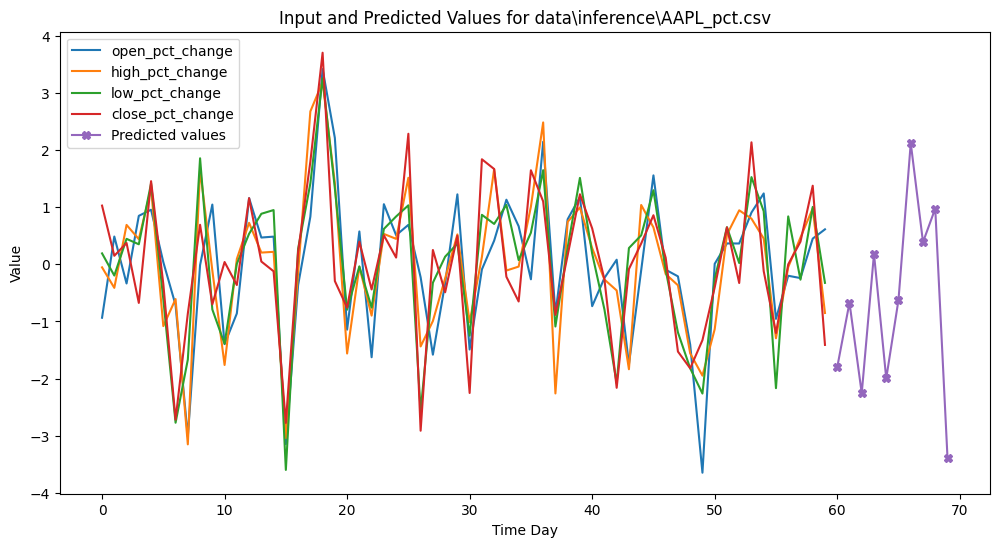

In [23]:

lastest_step = 1

input_df_path = r"data\inference\AAPL_pct.csv"
window_size = 60
time_interval = "Day" #d, m, s

input_df = pd.read_csv(input_df_path)
input_df.drop(['date', 'open','high','low','close','volume',], axis=1, inplace=True)


plt.figure(figsize=(12, 6))
x_axis_input = np.arange(window_size)
x_axis_pred = np.arange(window_size, window_size + lastest_pred.shape[0])


for c in input_df.columns:
    plt.plot(x_axis_input, input_df[c][-window_size * lastest_step: len(input_df[c]) + 1  - window_size * (lastest_step - 1)], label=c)

plt.plot(x_axis_pred, pred, label = "Predicted values", marker="X")




plt.xlabel(f'Time {time_interval}')
plt.ylabel('Value')
plt.title(f'Input and Predicted Values for {input_df_path}')
plt.legend()

plt.show()

In [ ]:
type(pred_raw)

In [ ]:
import torch 

print(type(torch.tensor(5).double()))

print((torch.tensor(5).double()).dtype)

print(torch.Tensor([5.23, 24.32]).dtype)

torch.Tensor([5.23, 24.32]).to('cuda')
